In [104]:
import cv2 as cv
import numpy as np

In [105]:
from joblib import load

In [106]:
from collections import Counter

In [107]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import MiniBatchKMeans

In [108]:
import pandas as pd

In [109]:
def count(data,clasterizator,N_cl=100):
    keys = range(0,N_cl)
    cnt = Counter(clasterizator.predict(data))
    print(data.shape)
    t_freq = [(cnt[c]+0.)/len(data) for c in keys]
    return np.array(t_freq)

In [110]:
def load_models(names, N_clusters, descriptor):
    models = []
    for name, N_cl in zip(names, N_clusters):
        cls = load(name+ '_' + descriptor + '_clasterizator_' + str(N_cl) + '.joblib')
        clf = load(name+ '_' + descriptor + '_classifier_' + str(N_cl) + '.joblib')
        models.append([cls, clf, N_cl])
    return models

In [111]:
def pipeline(descriptor):
    result = []
    for i, el in enumerate(models):
        marked = count(descriptor, el[0], el[2])
        marked = np.array([marked])
        result.append(el[1].predict(marked)[0] *  (i+1))
    return result

In [112]:
models = load_models(['cat', 'roly', 'gnome'], [10, 97, 100], 'AKAZE')

C:\Users\Serg\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MiniBatchKMeans from version 0.23.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [113]:
models[0]

[MiniBatchKMeans(max_iter=300, n_clusters=10, random_state=0),
 GradientBoostingClassifier(max_depth=9, n_estimators=37),
 10]

In [114]:
import time

In [115]:
import matplotlib.pyplot as plt

In [116]:
dictionary = {
    0: " ",
    1: "cat",
    2: "roly-poly",
    3: "gnome"
}

def text_overlay(image, label, dict_, height):
#     pos = (20, height-100)
    font_face = cv.FONT_HERSHEY_SIMPLEX
    scale = 3
    color = (172, 47, 226)
    for i in labels:
        pos = (20, height - 50-i*75)
        image = cv.putText(image, dict_[i], pos, font_face, scale, color, 4, cv.LINE_AA)
    return image

# cap = cv.VideoCapture("qq.mp4")
# cap = cv.VideoCapture("pp.mp4")
cap = cv.VideoCapture("NeyralCatwork.mp4")
width, height = (
    int(cap.get(cv.CAP_PROP_FRAME_WIDTH)),
    int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
)

fourcc = cv.VideoWriter_fourcc('m', 'p', '4', 'v')
out = cv.VideoWriter()
out.open('AKAZE_vidos.mp4', fourcc, 30, (width, height), True)

descriptor = cv.AKAZE_create()
times = []

if not cap.isOpened():
    print("Error opening video stream or file")
counter=0
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        if counter%10==0:
            #cv.imshow('Frame', frame) можете это отрубить, потому что это просто проигрывает видео и думаю оно будет подвисать
            # тута делаете распознавание и возвращаете мне labels[]
            start = time.time()
            gray_image = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
            kp, des = descriptor.detectAndCompute(gray_image, None)
            labels = np.array([0,0,0])
            if len(kp)>0:
                print(pipeline(des))
                labels = np.array(pipeline(des))
#             im = text_overlay(frame, labels, dictionary, height)
#             out.write(im)
#             counter=0
            finish = time.time()
            times.append(finish-start)
        
        im = text_overlay(frame, labels, dictionary, height)
        out.write(im)
        counter+=1

        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv.destroyAllWindows()

(276, 61)
(276, 61)
(276, 61)
[0, 2, 0]
(276, 61)
(276, 61)
(276, 61)
(318, 61)
(318, 61)
(318, 61)
[0, 2, 0]
(318, 61)
(318, 61)
(318, 61)
(314, 61)
(314, 61)
(314, 61)
[0, 2, 0]
(314, 61)
(314, 61)
(314, 61)
(221, 61)
(221, 61)
(221, 61)
[0, 2, 0]
(221, 61)
(221, 61)
(221, 61)
(76, 61)
(76, 61)
(76, 61)
[0, 2, 0]
(76, 61)
(76, 61)
(76, 61)
(13, 61)
(13, 61)
(13, 61)
[0, 2, 0]
(13, 61)
(13, 61)
(13, 61)
(16, 61)
(16, 61)
(16, 61)
[0, 2, 0]
(16, 61)
(16, 61)
(16, 61)
(87, 61)
(87, 61)
(87, 61)
[0, 2, 0]
(87, 61)
(87, 61)
(87, 61)
(155, 61)
(155, 61)
(155, 61)
[0, 2, 0]
(155, 61)
(155, 61)
(155, 61)
(276, 61)
(276, 61)
(276, 61)
[0, 2, 0]
(276, 61)
(276, 61)
(276, 61)
(364, 61)
(364, 61)
(364, 61)
[0, 2, 0]
(364, 61)
(364, 61)
(364, 61)
(283, 61)
(283, 61)
(283, 61)
[0, 2, 0]
(283, 61)
(283, 61)
(283, 61)
(357, 61)
(357, 61)
(357, 61)
[0, 2, 0]
(357, 61)
(357, 61)
(357, 61)
(344, 61)
(344, 61)
(344, 61)
[0, 2, 0]
(344, 61)
(344, 61)
(344, 61)
(366, 61)
(366, 61)
(366, 61)
[0, 2, 0]
(366

In [120]:
%matplotlib inline

In [121]:
times_df = pd.DataFrame(times, columns=['Times'])

In [125]:
characteristics = times_df.describe()

In [126]:
characteristics

,Times
count,106.000000
mean,0.099877
std,0.021576
min,0.075796
25%,0.091042
50%,0.095744
75%,0.102726
max,0.292922


In [127]:
quant1, quant2, quant3 = characteristics.loc['25%'][0], characteristics.loc['50%'][0], characteristics.loc['75%'][0]

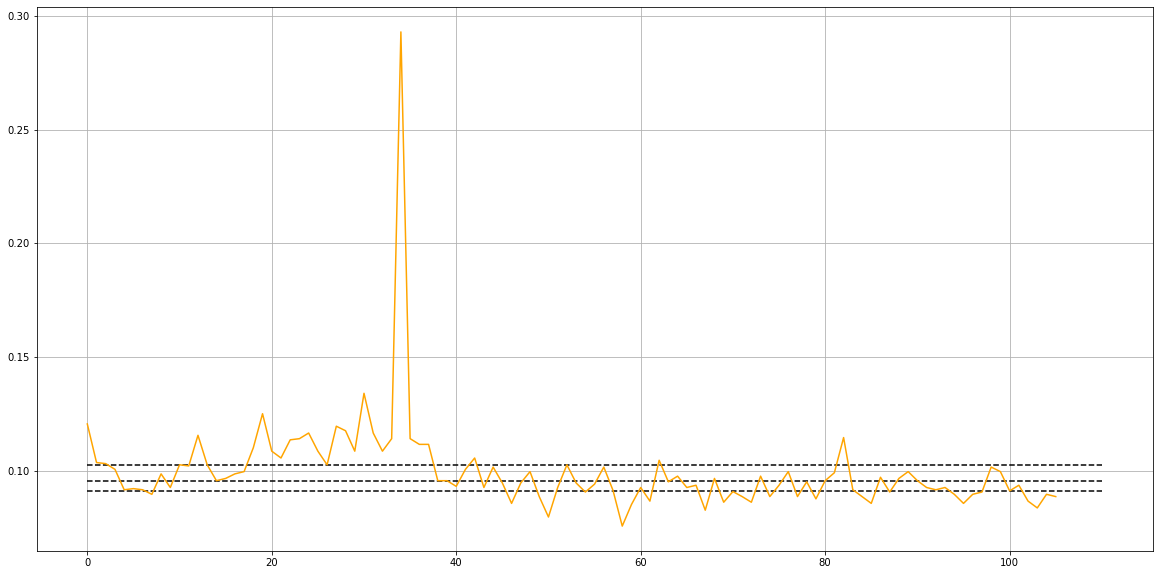

In [128]:
fig = plt.figure(figsize=(20, 10))
plt.plot(times, color='orange')
plt.hlines([quant1, quant2, quant3], 0, 110, linestyles='dashed')
plt.grid()